In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
import tensorflow as tf
from sklearn.metrics import confusion_matrix

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)



In [2]:
df = pd.read_csv("DataSet/HAM.csv")
df['image_id'] = df['image_id'].apply(lambda x: x + ".jpg")
# Encode the labels
le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['dx'])
df['encoded_label'] = df['encoded_label'].astype(str)

# Split the dataset into training, testing, and validation sets
train_df, test_valid_df = train_test_split(df, test_size=0.3, random_state=42)
test_df, valid_df = train_test_split(test_valid_df, test_size=0.5, random_state=42)

# Define image dimensions and batch size
img_size = (100, 100)
batch_size = 16
train_df['image_id'] = 'DataSet/Combined/' + train_df['image_id']
valid_df['image_id'] = 'DataSet/Combined/' + valid_df['image_id']
test_df['image_id'] = 'DataSet/Combined/' + test_df['image_id']

In [3]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.7, 1.3),
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255  # Rescale pixel values to the [0, 1] range
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_id',
    y_col='encoded_label',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)
test_valid_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_valid_datagen.flow_from_dataframe(
    test_df,
    x_col='image_id',
    y_col='encoded_label',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = test_valid_datagen.flow_from_dataframe(
    valid_df,
    x_col='image_id',
    y_col='encoded_label',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 7010 validated image filenames belonging to 7 classes.
Found 1502 validated image filenames belonging to 7 classes.
Found 1503 validated image filenames belonging to 7 classes.


Training with activation: leaky_relu, optimizer: adam
Epoch 1/150
439/439 [==============================] - 103s 232ms/step - loss: 1.1236 - accuracy: 0.6606 - val_loss: 1.0089 - val_accuracy: 0.6680
Epoch 2/150
439/439 [==============================] - 108s 246ms/step - loss: 1.0042 - accuracy: 0.6663 - val_loss: 0.9582 - val_accuracy: 0.6680
Epoch 3/150
439/439 [==============================] - 101s 229ms/step - loss: 0.9895 - accuracy: 0.6708 - val_loss: 0.9241 - val_accuracy: 0.6560
Epoch 4/150
439/439 [==============================] - 100s 228ms/step - loss: 0.9642 - accuracy: 0.6719 - val_loss: 0.9531 - val_accuracy: 0.6820
Epoch 5/150
439/439 [==============================] - 97s 220ms/step - loss: 0.9333 - accuracy: 0.6738 - val_loss: 0.9284 - val_accuracy: 0.6593
Epoch 6/150
439/439 [==============================] - 101s 229ms/step - loss: 0.9489 - accuracy: 0.6723 - val_loss: 0.8965 - val_accuracy: 0.6687
Epoch 7/150
439/439 [==============================] - 83s 188ms/

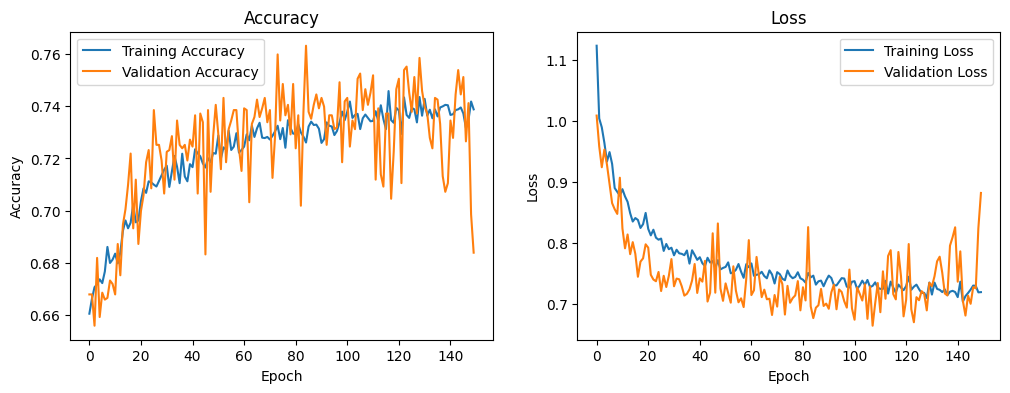

94/94 [==============================] - 22s 234ms/step - loss: 0.8729 - accuracy: 0.6931
Training with activation: leaky_relu, optimizer: rmsprop
Epoch 1/150
439/439 [==============================] - 55s 123ms/step - loss: 1.2620 - accuracy: 0.6462 - val_loss: 1.0609 - val_accuracy: 0.6593
Epoch 2/150
439/439 [==============================] - 54s 123ms/step - loss: 1.0866 - accuracy: 0.6548 - val_loss: 0.9211 - val_accuracy: 0.6660
Epoch 3/150
439/439 [==============================] - 54s 123ms/step - loss: 1.0263 - accuracy: 0.6641 - val_loss: 1.0710 - val_accuracy: 0.6640
Epoch 4/150
439/439 [==============================] - 54s 122ms/step - loss: 1.0388 - accuracy: 0.6639 - val_loss: 0.9249 - val_accuracy: 0.6660
Epoch 5/150
439/439 [==============================] - 54s 122ms/step - loss: 1.0001 - accuracy: 0.6666 - val_loss: 0.9329 - val_accuracy: 0.6640
Epoch 6/150
439/439 [==============================] - 54s 123ms/step - loss: 0.9795 - accuracy: 0.6679 - val_loss: 0.9692 

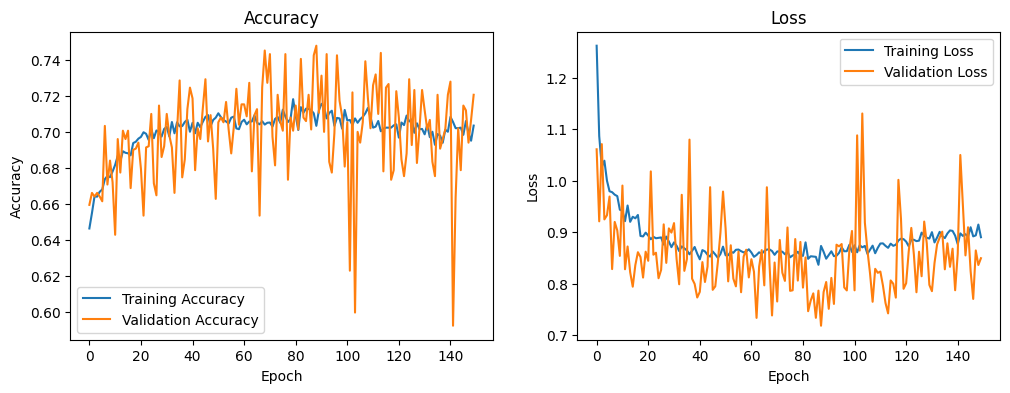

94/94 [==============================] - 7s 74ms/step - loss: 0.8449 - accuracy: 0.7217
Training with activation: relu, optimizer: adam
Epoch 1/150
439/439 [==============================] - 56s 124ms/step - loss: 1.1202 - accuracy: 0.6686 - val_loss: 1.0105 - val_accuracy: 0.6587
Epoch 2/150
439/439 [==============================] - 54s 122ms/step - loss: 1.0114 - accuracy: 0.6715 - val_loss: 1.0252 - val_accuracy: 0.6587
Epoch 3/150
439/439 [==============================] - 54s 122ms/step - loss: 0.9979 - accuracy: 0.6715 - val_loss: 0.9698 - val_accuracy: 0.6587
Epoch 4/150
439/439 [==============================] - 54s 122ms/step - loss: 0.9947 - accuracy: 0.6719 - val_loss: 0.9574 - val_accuracy: 0.6587
Epoch 5/150
439/439 [==============================] - 54s 122ms/step - loss: 0.9863 - accuracy: 0.6720 - val_loss: 0.9538 - val_accuracy: 0.6587
Epoch 6/150
439/439 [==============================] - 54s 122ms/step - loss: 0.9758 - accuracy: 0.6729 - val_loss: 0.9780 - val_accur

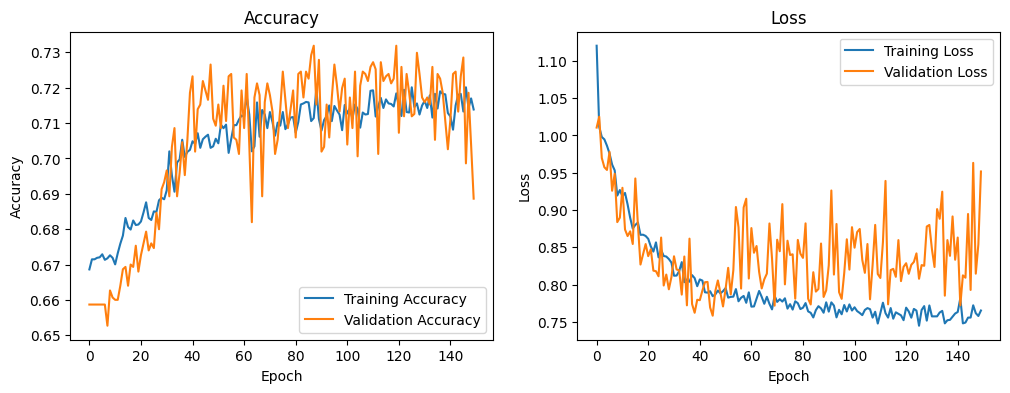

94/94 [==============================] - 9s 93ms/step - loss: 0.9411 - accuracy: 0.6991
Training with activation: relu, optimizer: rmsprop
Epoch 1/150
439/439 [==============================] - 64s 144ms/step - loss: 1.2728 - accuracy: 0.6678 - val_loss: 1.0185 - val_accuracy: 0.6587
Epoch 2/150
439/439 [==============================] - 63s 143ms/step - loss: 1.0368 - accuracy: 0.6718 - val_loss: 1.0133 - val_accuracy: 0.6587
Epoch 3/150
439/439 [==============================] - 65s 147ms/step - loss: 1.0195 - accuracy: 0.6718 - val_loss: 0.9944 - val_accuracy: 0.6587
Epoch 4/150
439/439 [==============================] - 64s 144ms/step - loss: 1.0205 - accuracy: 0.6710 - val_loss: 0.9250 - val_accuracy: 0.6587
Epoch 5/150
439/439 [==============================] - 63s 144ms/step - loss: 1.0118 - accuracy: 0.6716 - val_loss: 0.9463 - val_accuracy: 0.6587
Epoch 6/150
439/439 [==============================] - 64s 145ms/step - loss: 1.0173 - accuracy: 0.6713 - val_loss: 0.9588 - val_ac

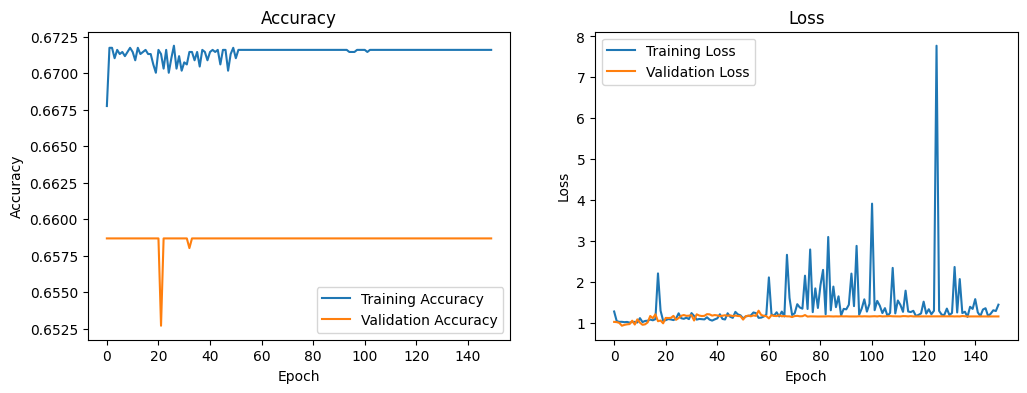

94/94 [==============================] - 7s 77ms/step - loss: 1.1158 - accuracy: 0.6704
Training with activation: swish, optimizer: adam
Epoch 1/150
439/439 [==============================] - 57s 127ms/step - loss: 1.0715 - accuracy: 0.6613 - val_loss: 1.1772 - val_accuracy: 0.5835
Epoch 2/150
439/439 [==============================] - 56s 126ms/step - loss: 1.0104 - accuracy: 0.6702 - val_loss: 1.2988 - val_accuracy: 0.5921
Epoch 3/150
439/439 [==============================] - 56s 127ms/step - loss: 0.9759 - accuracy: 0.6705 - val_loss: 1.2426 - val_accuracy: 0.5429
Epoch 4/150
439/439 [==============================] - 55s 126ms/step - loss: 0.9581 - accuracy: 0.6739 - val_loss: 0.9847 - val_accuracy: 0.6307
Epoch 5/150
439/439 [==============================] - 55s 126ms/step - loss: 0.9399 - accuracy: 0.6767 - val_loss: 1.0901 - val_accuracy: 0.6707
Epoch 6/150
439/439 [==============================] - 56s 127ms/step - loss: 0.9302 - accuracy: 0.6779 - val_loss: 1.0931 - val_accu

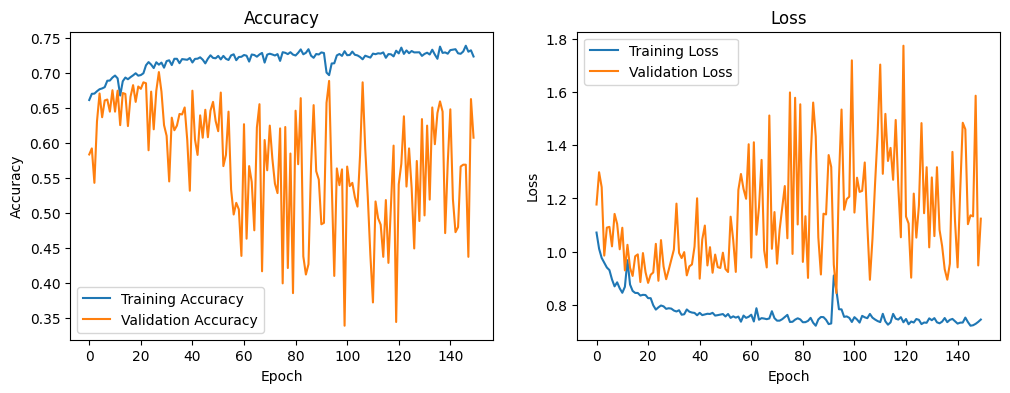

94/94 [==============================] - 8s 88ms/step - loss: 1.1229 - accuracy: 0.6092
Training with activation: swish, optimizer: rmsprop
Epoch 1/150
439/439 [==============================] - 74s 165ms/step - loss: 1.2033 - accuracy: 0.6521 - val_loss: 1.0286 - val_accuracy: 0.6480
Epoch 2/150
439/439 [==============================] - 73s 165ms/step - loss: 1.0465 - accuracy: 0.6579 - val_loss: 1.1593 - val_accuracy: 0.6094
Epoch 3/150
439/439 [==============================] - 64s 145ms/step - loss: 1.0007 - accuracy: 0.6672 - val_loss: 1.0085 - val_accuracy: 0.6494
Epoch 4/150
439/439 [==============================] - 56s 127ms/step - loss: 0.9692 - accuracy: 0.6725 - val_loss: 1.1103 - val_accuracy: 0.6560
Epoch 5/150
439/439 [==============================] - 56s 127ms/step - loss: 0.9595 - accuracy: 0.6750 - val_loss: 1.0493 - val_accuracy: 0.6607
Epoch 6/150
439/439 [==============================] - 56s 127ms/step - loss: 0.9365 - accuracy: 0.6825 - val_loss: 0.9927 - val_a

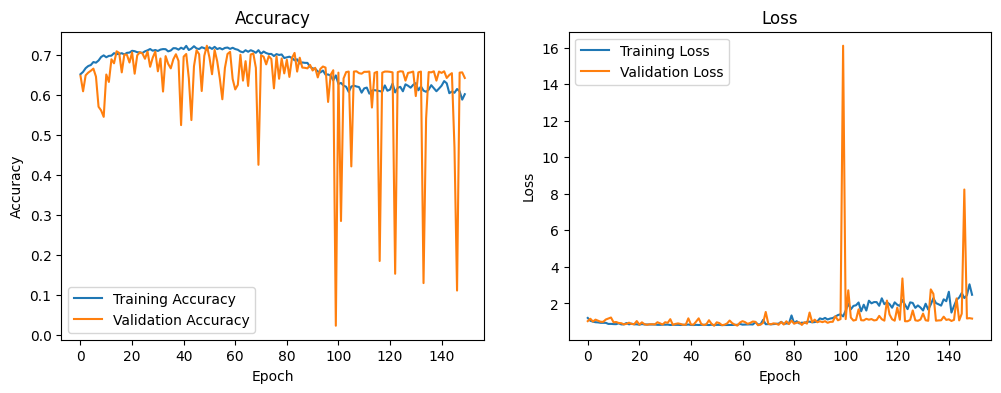

94/94 [==============================] - 26s 283ms/step - loss: 1.1306 - accuracy: 0.6558


In [5]:
activation_functions = ['leaky_relu','relu','swish']
optimizers = ['adam', 'rmsprop']

results = []

for activation in activation_functions:
    for optimizer in optimizers:
        print(f"Training with activation: {activation}, optimizer: {optimizer}")

        # Create a Sequential model
        model = Sequential()

        # Block 1
        model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), input_shape=(100, 100, 3)))
        model.add(Activation(activation))
        model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1)))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
        model.add(Dropout(0.25))

        # Block 2
        model.add(Conv2D(32, kernel_size=(3, 3)))
        model.add(Activation(activation))
        model.add(Conv2D(32, kernel_size=(3, 3)))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # Flatten the output
        model.add(Flatten())

        # Other layers
        model.add(Dense(128))
        model.add(Activation(activation))
        model.add(Dropout(0.5))
        model.add(Dense(7, activation='softmax'))  # Assuming 7 classes for classification

        # Compile the model with the selected optimizer
        if optimizer == 'adam':
            model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
        else:
            model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

        # Train the model using your dataset
        history = model.fit(train_generator, validation_data=valid_generator, epochs=150, verbose=1)

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()

        # Evaluate the model
        train_loss, train_acc = model.evaluate(train_generator)
        valid_loss, valid_acc = model.evaluate(valid_generator)
        test_loss, test_acc = model.evaluate(test_generator)
        
        result = {
            'activation': activation,
            'optimizer': optimizer,
            'train_loss': train_loss,
            'train_acc': train_acc,
            'valid_loss': valid_loss,
            'valid_acc': valid_acc,
            'test_loss': test_loss,
            'test_acc': test_acc
        }

        results.append(result)

In [6]:
for result in results:
    print(f"Activation: {result['activation']}, Optimizer: {result['optimizer']}")
    print(f"Train Loss: {result['train_loss']}, Train Acc: {result['train_acc']}")
    print(f"Validation Loss: {result['valid_loss']}, Validation Acc: {result['valid_acc']}")
    print(f"Test Loss: {result['test_loss']}, Test Acc: {result['test_acc']}")
    print("\n")

Activation: leaky_relu, Optimizer: adam
Train Loss: 0.8105307817459106, Train Acc: 0.7065620422363281
Validation Loss: 0.8818621039390564, Validation Acc: 0.6839653849601746
Test Loss: 0.8729125261306763, Test Acc: 0.6930758953094482


Activation: leaky_relu, Optimizer: rmsprop
Train Loss: 0.8234068751335144, Train Acc: 0.7330955862998962
Validation Loss: 0.8495446443557739, Validation Acc: 0.7205588817596436
Test Loss: 0.8448745012283325, Test Acc: 0.7217044234275818


Activation: relu, Optimizer: adam
Train Loss: 0.9430117011070251, Train Acc: 0.6948644518852234
Validation Loss: 0.9516879916191101, Validation Acc: 0.688622772693634
Test Loss: 0.941140353679657, Test Acc: 0.6990678906440735


Activation: relu, Optimizer: rmsprop
Train Loss: 1.1306092739105225, Train Acc: 0.6716119647026062
Validation Loss: 1.1519733667373657, Validation Acc: 0.658682644367218
Test Loss: 1.115753412246704, Test Acc: 0.6704394221305847


Activation: swish, Optimizer: adam
Train Loss: 1.7340997457504272,